# Automation: 

In [1]:
%pwd

'/Users/owner/AllelicAssociation/2018-01-11_Jupyter-Carpentry-Workshop/Code'

In [105]:
#Import necessary libraries
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

In [12]:
#Variable that precedes print statements
#If verbose = 0: print statements will not print
#If verbose = 1: print statements will print
VERBOSE = 0

In [13]:
#Read in cleaned data as data frame
cleaned_data_location = "../data/gapminder_cleaned.csv"
df = pd.read_csv(cleaned_data_location)
df.head()

#Debugging sidenote; **Defensive Programming**
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
except FileNotFound:
    print("Couldn't open file. Wrong path? You tired ", cleaned_data_location)

In [19]:
#Get years
years = df['year'].unique()
years.sort()
#Add assertion to include assumptions, such as the expected range of the data
#Add in prior info; and remember ur assumptions made based on knowledge of data and bio
assert min(years)==1952
assert max(years)==2007

What is the mean life expectancy in Asia through time?

In [27]:
#Start with 1952
#Narrow down our data to Asia
mask_asia = df['continent']=='asia' #This is a series of true and false in one column
df_asia = df[mask_asia]

mask_1952 = df_asia['year']==1952
df_1952 = df_asia[mask_1952]

meanAsia1952 = np.mean(df_1952['lifeexp'])

In [33]:
#Alternative to typing in each year one at a time
#What years do we have info for in Asia to loop over

#Narrow down our data to Asia
mask_asia = df['continent']=='asia' #This is a series of true and false in one column
df_asia = df[mask_asia]

#What years do we have for Asia
yearsAsia = df_asia['year'].unique()
summary = []
#Go through each year
for yr in yearsAsia:
    if VERBOSE:
        print(year)
    mask_yr = df_asia['year']==yr
    df_yr = df_asia[mask_yr]
    meanValue = np.mean(df_yr['lifeexp'])
    summary.append(['asia',yr,meanValue])
#Turn list to data frame
AsiaMeans = pd.DataFrame(summary, columns=['Continent','Year','LifeExp'])
AsiaMeans

,Continent,Year,LifeExp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


How could we use variables to make it easier to re-run this across continents?

In [47]:
VERBOSE = 0
#Now loop over each continent and then each year
meanContinentsPerYear = []
#Run through continent
continents = df['continent'].unique()
for cont in continents:
    mask_cont = df['continent'] == cont
    df_cont = df[mask_cont]
    #Run through the years
    yrCont = df_cont['year'].unique()
    for yr in yrCont:
        if VERBOSE:
            print(yr,cont)
        mask_yr = df_cont['year']==yr
        df_yr = df_cont[mask_yr]
        meanValue = np.mean(df_yr['lifeexp'])
        meanContinentsPerYear.append([cont,yr,meanValue])
        

#Turn list to data frame
meanContinentsPerYear = pd.DataFrame(meanContinentsPerYear, columns=['Continent','Year','LifeExp'])

#Get the mean over the years for each continent
meanContinentsPerYear.groupby('Continent').mean()

,Year,LifeExp
Continent,,
africa,1979.5,48.865330
americas,1979.5,64.658737
asia,1979.5,60.064903
europe,1979.5,71.903686
oceania,1979.5,74.326208


**Functions: ** Convert this into a function to be modular

In [82]:
#Write a function to calculate mean value per year for a continent for categories
#Return data frame with continent, year, and mean value for the category
def calculate_mean_over_time(data,category,continent):
    """#Write a function to calculate mean value per year for a continent for categories
        #Return data frame with continent, year, and mean value for the category"""
    #Create a mask that selects the continent of choice
    mask_continent = data['continent']==continent #Requires that data frame has a column named 'continent'
    data_continent = data[mask_continent]
    
    #Loop through years and calculate the mean
    years = data_continent['year'].unique() #Requires that data frame has a column named 'year'
    summary = []
    for year in years:
        mask_year = data_continent['year']==year
        data_year = data_continent[mask_year]
        value= np.mean(data_year[category])
        summary.append([continent,year,value])
    summary = pd.DataFrame(summary,columns = ["Continent","Year",category])
    return summary

In [97]:
#Redo function but to calculate median 
#Assert that hard wired column names are fine

#Write a function to calculate statistic value per year for a continent for categories
#Return data frame with continent, year, and mean value for the category
#Specify statistic you want: np.mean,np.media,np.min
def calculate_statistic_over_time(data,category,continent,statistic): #Specify statistic you want
    """Calculate values of a statistic through time
    Args:
        data: pandas data frame that includes columns: 'continent' and 'year'
        category: string that is one of the column headings in data
        continent: string that is one of the values in the continent column
        statistic: function that can operate on a list of numbers; No paranthesis (e.g. np.mean)
    Return:
        pandas data frame with the headings Continent, Year, and Category
        """
    #Assert that column names are in your data 
    assert ('continent'in data.columns.values)
    #Check that continent used for function by user is actually in data frame
    assert (continent in data['continent'].unique())
    #Assert that year name in your data
    assert ('year' in data.columns.values)
    
    #Create a mask that selects the continent of choice
    mask_continent = data['continent']==continent #Requires that data frame has a column named 'continent'
    data_continent = data[mask_continent]
    
    #Loop through years and calculate the mean
    years = data_continent['year'].unique() #Requires that data frame has a column named 'year'
    summary = []
    for year in years:
        mask_year = data_continent['year']==year
        data_year = data_continent[mask_year]
        value= statistic(data_year[category])
        summary.append([continent,year,value])
    summary = pd.DataFrame(summary,columns = ["Continent","Year",category])
    return summary

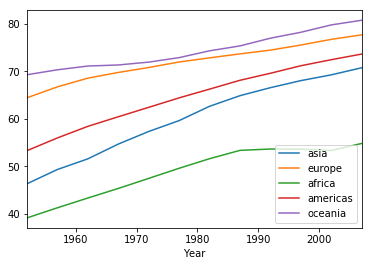

In [106]:
#Use this function to plot mean life expectancy over time across continents
continents = df['continent'].unique()
#Generate figure to add plots to it in loop
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df,'lifeexp',continent, np.mean)
    output.plot.line('Year','lifeexp',ax=ax,label=continent)

Put this as a helper file with all of your functions
Import this file after downloading as python file .py
import sys
import os
scriptpath = "/home/path-to-file/code"